In [1]:
%pylab inline
import numpy as np
from scipy import *

Populating the interactive namespace from numpy and matplotlib


## Review of linear algebra

This notebook is a quick review of the concepts and notation of linear algebra and their implementation in the python library `numpy`.

It is not intended as a course in linear algebra. For an excellent elementary introduction to vectors and linear algebra, see [Gilbert Strang's course on linear algebra](http://web.mit.edu/18.06/www/videos.shtml)

## Vectors
* arrows
* velocity and direction
* location in the plane or in 3D space.
* many many other things.

Vectors spaces are the at the basis of linear algebra. They can be used to describe many things: from points in the plane, to time series to the configuration of electrons in an atom. This notebook is a brief review of some of the main concepts regarding vectors in finite dimensional Euclidean space. 

### A 2D vector

<img style="width:400px" src="../../img/t12-01_vector.png">

### A 3D vector

<img style="width:300px" src="../../img/t12-02_vectorGeom1.png">

### Vector notation

* We will denote vectors by letters with a little arrow on top: $\vec{a},\vec{b},\vec{v}_1,\vec{v}_2,\ldots$

* Vectors are grouped by **dimension ${\bf d}$**, the set of all $d$ dimensional (euclidean) vectors is denoted $R^d$.

* A 2D vector is an element of $R^2$ and is described by a sequence of **two** real numbers: $\vec{a} = [1,\pi]$ or $\vec{b}=[-1.56,1.2]$

* A 3D vector is an element of $R^3$  
described by a sequence of **three** numbers:  
$\vec{a} = [1,\pi,-\pi]$ or $\vec{b}=[-1.56,1.2,0]$

* A $d$ dimensional vector is an element of $R^d$ and is described by a sequence of $d$ real numbers: $\vec{a} = [a_1,a_2,\ldots,a_d]$

### Lists vs Numpy Arrays

The numpy library (we will reference it by np) is the workhorse library for linear algebra in python.  To creat a vector simply surround a python list ($[1,2,3]$) with the np.array function:

In [2]:
x_vector = np.array([1,2,3])
print(x_vector)

[1 2 3]


The function `np.array` converts a python list and converts it to an array:

In [3]:
c_list = [1,2]
print("The list:",c_list)
print("Has length:", len(c_list))

c_vector = np.array(c_list)
print("The vector:", c_vector)
print("Has shape:",c_vector.shape)

The list: [1, 2]
Has length: 2
The vector: [1 2]
Has shape: (2,)


In [4]:
z = [5,6]   # a list
print("This is a list, not an array:",z)
print(type(z))

This is a list, not an array: [5, 6]
<class 'list'>


In [5]:
zarray = np.array(z)
print("This is an array, not a list",zarray)
print(type(zarray))

This is an array, not a list [5 6]
<class 'numpy.ndarray'>


### Arrays as Vectors
One way to define vectors in numpy is to use a one dimensional array.

In [6]:
v1=np.array([1,2])
v2=np.array([-1,1])
print(v1,v2)

[1 2] [-1  1]


#### Vector dimension vs. Array dimension

The word **dimension** has two different meanings in this context.

* The array `np.array([1,2,3,4])` **defines a vector** in $R^4$, i.e. a vector of dimension $4$ 

* The array `np.array([1,2,3,4])`  
**is** a 1D array, which is a list of numbers.

* The array `np.array([[1,2],[3,4]])` is a 2D array, which is a rectangle of numbers.

* A 2D array is also called a **Matrix** (more about those later)

In [7]:
np.array([[1,2],[3,4]])

array([[1, 2],
       [3, 4]])

### Visualizing 2D vectors.

The world that we see and experience is three dimensional. Therefor vectors in $R^3$ can be visualized. The screen you are looking at is 2D, which makes it particularly easy to visualize 2D vectors.

Vectors are commonly represented by arrows. The tail of the arrow is at zero, and the $(x,y)$ coordinates of the head of the arrow correspond to the two components of the vector: $\vec{a} = [a_1,a_2]$ 

In [37]:
import matplotlib.pyplot as plt
from numpy.linalg import norm
text_loc=1.1
def plot_arrows(L,scale=4,text_loc=0.2,fontsize=12, fname=None):
    """ Plot a list of arrows. Each arrow defined by start and end points and a color and optionally text"""
    plt.figure(figsize=[6,6])
    plt.xlim([-scale,scale])
    plt.ylim([-scale,scale])
    ax = plt.axes()
    plt.xlabel('1st coord (x)')
    plt.ylabel('2nd coord (y)')
    #ax.axis('equal')

    for A in L:
        s,e,c=A[:3]
        ax.arrow(s[0], s[1], e[0], e[1], head_width=0.05*scale, head_length=0.1*scale, \
                 fc=c, ec=c,length_includes_head=True);
        if len(A)==4:
            t=A[3]
            _loc=1+text_loc/norm(e)
            ax.text(_loc*e[0],_loc*e[1],t,fontsize=fontsize)
    plt.grid()
    if fname != None:
        file = '../../img/{}'.format(fname)
        plt.savefig(file)
    return ax
zero=np.array([0,0])

Here are a few examples:

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


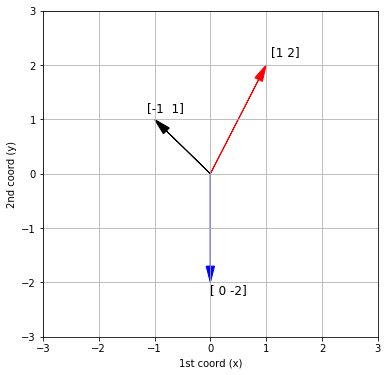

In [39]:
v1=np.array([1,2])
v2=np.array([-1,1])
v3=np.array([0,-2])
# plot_arrows([[zero,v1,'r',str(v1)],[zero,v2,'k',str(v2)],[zero,v3,'b',str(v3)]], scale=3, fname='t12-03.png');
plot_arrows([[zero,v1,'r',str(v1)],[zero,v2,'k',str(v2)],[zero,v3,'b',str(v3)]], scale=3);

### Operations on Vectors
Vectors (represented as 1D arrays) can be added, inverted, and multiplied by a scalar

In [40]:
print('v1=',v1,'v2=',v2)
print('v1+v2=',v1+v2)
print('4*v2=',4*v2)
print('-v1=',-v1)

v1= [1 2] v2= [-1  1]
v1+v2= [0 3]
4*v2= [-4  4]
-v1= [-1 -2]


v1= [1 2] v2= [-1  1]
the red arrow is v1, the black arrow is v2, the blue arrow is v1+v2


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


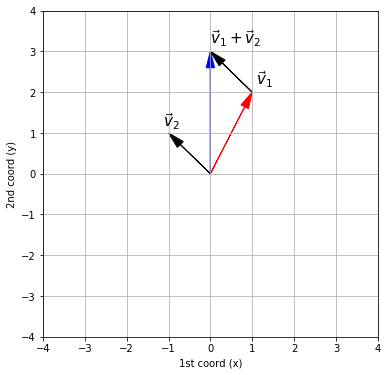

In [41]:
# A visualization of the sum of two 2D vectors.
v1=np.array([1,2])
v2=np.array([-1,1])
print('v1=',v1,'v2=',v2)
print("the red arrow is v1, the black arrow is v2, the blue arrow is v1+v2")
plot_arrows([[zero,v1,'r','$\\vec{v}_1$'],[zero,v2,'k','$\\vec{v}_2$'],[v1,v2,'k'],[zero,v1+v2,'b','$\\vec{v}_1+\\vec{v}_2$']],fontsize=15);

v= [1 2] c= -0.5
the red arrow is v, the black arrow is -0.50*v


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


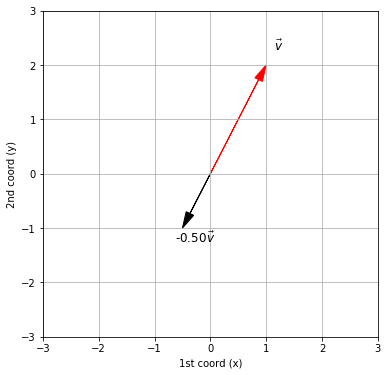

In [42]:
v=np.array([1,2])
c=-.5
print('v=',v1,'c=',c)
print("the red arrow is v, the black arrow is %4.2f*v"%c)
plot_arrows([[zero,v1,'r','$\\vec{v}$'],[zero,c*v1,'k',"%4.2f$\\vec{v}$"%c]],text_loc=0.3,scale=3);

### The inner product
The **inner product** or **dot product** is an operation that takes as input two vectors of the same dimension, and outputs a number (a scalar). The mathematical notation for the dot product of the vectors $\vec{a}$ and $\vec{b}$ is $\vec{a} \cdot \vec{b}$

In [43]:
print("three ways to calculate the dot product of ",v1,v2,'all give the same result:')
print(np.dot(v1,v2),)
print(v1[0]*v2[0] + v1[1]*v2[1],)
print(sum([v1[i]*v2[i] for i in range(len(v1))]) )

three ways to calculate the dot product of  [1 2] [-1  1] all give the same result:
1
1
1


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  after removing the cwd from sys.path.


### The norm of a vector
The **length**, **magnitude** or **norm** of a vector is the distance between the origin, where the vectors starts, and it's tip. Calculated as:
$$\| \vec{v} \| = \sqrt{\sum_i v_i^2} = \sqrt{\vec{v}\cdot\vec{v}}$$

<img style="width:300px" src="../../img/t12-01_vector.png">

In [44]:
from numpy.linalg import norm
from math import sqrt
print("two ways of calculating the norm of the vector",v1)
print(sqrt(np.dot(v1,v1)),)
print(norm(v1))

two ways of calculating the norm of the vector [1 2]
2.23606797749979
2.23606797749979


### Unit vectors
Of particular importance are vectors whose norm is **1**, such vectors are called *unit vectors*

In [45]:
print( """Any vector can be *normalized* to have unit length 
by dividing the vector by its norm.
below we set `u1` to be the normalized version of `v1`
""")

print('v1=',v1,'norm(v1)=',norm(v))
print('u1 is a normalized version of v1: u1=v1/norm(v1)')
u1=v1/norm(v1)
print('u1=',u1,'norm(u1)=',norm(u1))

Any vector can be *normalized* to have unit length 
by dividing the vector by its norm.
below we set `u1` to be the normalized version of `v1`

v1= [1 2] norm(v1)= 2.23606797749979
u1 is a normalized version of v1: u1=v1/norm(v1)
u1= [0.4472136  0.89442719] norm(u1)= 0.9999999999999999


### Projections
Taking the dot product of an arbitrary vector `v2` with a unit vector `u1` has a simple geometric interpretation

In [46]:
p=u1*np.dot(u1,v2)
print(p)

[0.2 0.4]


The red arrow is the unit vector u1, the black arrow is v2
The blue line indicates the projection of v2 on the direction u1
The green arrow is the result of this projection
The NORM of the green arrow is equal to the dot product dot(u1,v2)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


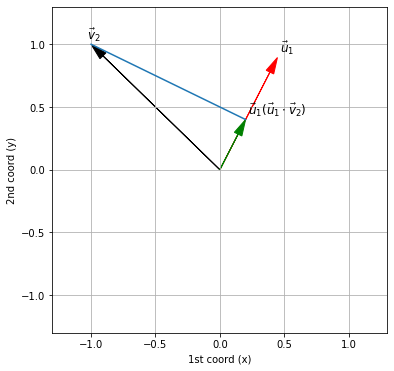

In [51]:
print("""The red arrow is the unit vector u1, the black arrow is v2
The blue line indicates the projection of v2 on the direction u1
The green arrow is the result of this projection
The NORM of the green arrow is equal to the dot product dot(u1,v2)""")
ax=plot_arrows([[zero,u1,'r','$\\vec{u}_1$'],[zero,v2,'k','$\\vec{v}_2$'],\
                [zero,p,'g',"$\\vec{u}_1(\\vec{u}_1\\cdot \\vec{v}_2)$"]],\
#                scale=1.3,text_loc=0.05, fname='t12-04.png')
               scale=1.3,text_loc=0.05)
ax.plot([v2[0],p[0]],[v2[1],p[1]]);

### Orthogonal vectors
Two vectors are orthogonal if their dot product is zero.

Equivalently, two vectors are orthogonal if the angle between them is 90 degrees.

black vector= [2 2] red_vector= [-1  1]
np.dot(a,b)= 0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


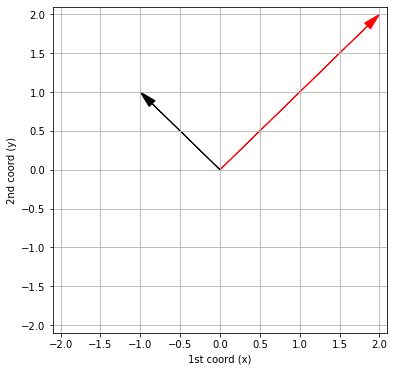

In [52]:
a=np.array([2,2])
b=np.array([-1,1])
print('black vector=',a,'red_vector=',b)
print('np.dot(a,b)=',np.dot(a,b))
plot_arrows([[zero,a,'r'],[zero,b,'k']],scale=2.1);

## Orthonormal basis
We say that the vectors $\vec{u}_1,\vec{u}_2,\ldots,\vec{u}_d \in R^d$ form an **orthonormal basis** of $R^d$. If:

**Normality:** $\vec{u}_1,\vec{u}_2,\ldots,\vec{u}_d$ are unit vectors:  
$\forall 1 \leq i \leq d: \vec{u}_i \cdot \vec{u}_i =1 $

**Orthogonality:** Every pair of vectors are orthogonal:  
$\forall 1 \leq i\neq j \leq d: \vec{u}_i \cdot \vec{u}_j =0 $

### The Standard basis
The standard basis is: $\vec{e}_1 = [1,0,0,\ldots,0], \vec{e}_2 = [0,1,0,\ldots,0],$   

$\ldots,\vec{e}_d = [0,0,0,\ldots,1]$

The dot product of a vector $\vec{v}$  
with a standard basis vector $\vec{e}_i$  
is equal to the $i$th coordinate of $\vec{v}$,  
which we denote by $v_i$

In [53]:
v=np.array([5,6,3,4])
e2=np.array([0,1,0,0])
np.dot(v,e2)

6

### Reconstruction using an orthonormal basis
Orthonormal basis define a *coordinate system* and allow us to move between coordinate systems.

An orthonormal basis $\vec{u}_1,\ldots,\vec{u}_d$ can be used to represent any vector $\vec{v}$ in the following way. 

$\vec{v}$ is **represented** as a list of $d$ dot products: $$[\vec{v}\cdot\vec{u_1},\vec{v}\cdot\vec{u_2},\ldots,\vec{v}\cdot\vec{u_d}]$$

$\vec{v}$ is **reconstructed** by summing its projections on the basis vectors:
$$\vec{v} = (\vec{v}\cdot\vec{u_1})\vec{u_1} + \cdots + (\vec{v}\cdot\vec{u_d})\vec{u_d}$$

* Representing a vector $\vec{v}$ using the **standard** basis is yields the representation $[v_1,v_2,\ldots,v_d]$

* Representing $\vec{v}$ using an orthonormal basis is called a **change of basis**

### Visualizing change of basis
It is instructive to visualize a change of basis in $R^2$

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


We are changing the basis representing the vector v
from the standard basis (e1,e2) to a new orthonormal basis (u1,u2)
The green arrows are the projections of v onto the directions defined by u1 and u2


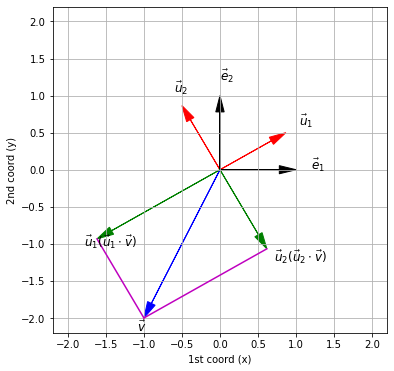

In [55]:
from math import sin,cos
v=np.array([-1,-2])
e1=np.array([1,0])
e2=np.array([0,1])
angle=np.pi/6.0 # 30 degrees
u1=np.array([cos(angle),sin(angle)])
u2=np.array([-sin(angle),cos(angle)])
v,e1,e2,u1,u2
p1=u1*np.dot(u1,v)
p2=u2*np.dot(u2,v)
ax=plot_arrows([[zero,u1,'r','$\\vec{u}_1$'],[zero,u2,'r','$\\vec{u}_2$'],
               [zero,e1,'k','$\\vec{e}_1$'],[zero,e2,'k','$\\vec{e}_2$'],\
               [zero,v,'b','$\\vec{v}$'],\
               [zero,p1,'g',"$\\vec{u}_1(\\vec{u}_1\\cdot \\vec{v})$"],\
               [zero,p2,'g',"$\\vec{u}_2(\\vec{u}_2\\cdot \\vec{v})$"]],\
               scale=2.2,text_loc=0.2)
ax.plot([v[0],p1[0]],[v[1],p1[1]],'m');
ax.plot([v[0],p2[0]],[v[1],p2[1]],'m');
print("""We are changing the basis representing the vector v
from the standard basis (e1,e2) to a new orthonormal basis (u1,u2)
The green arrows are the projections of v onto the directions defined by u1 and u2""")
# plt.savefig('../../img/t12-05.png')

## Next video: Matrix notation.